# #Amazon.com - Employee Access Challenge

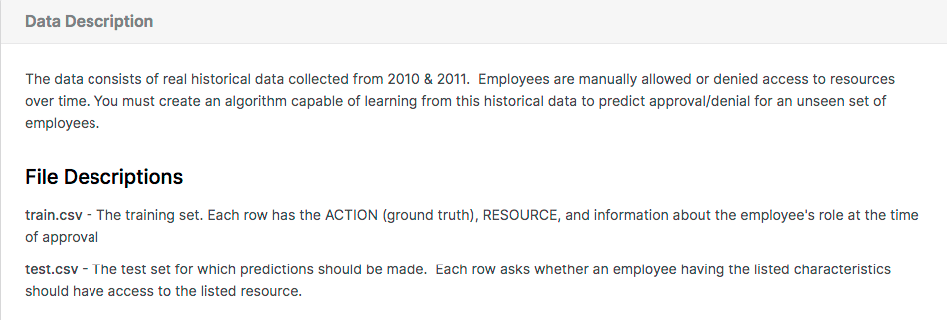


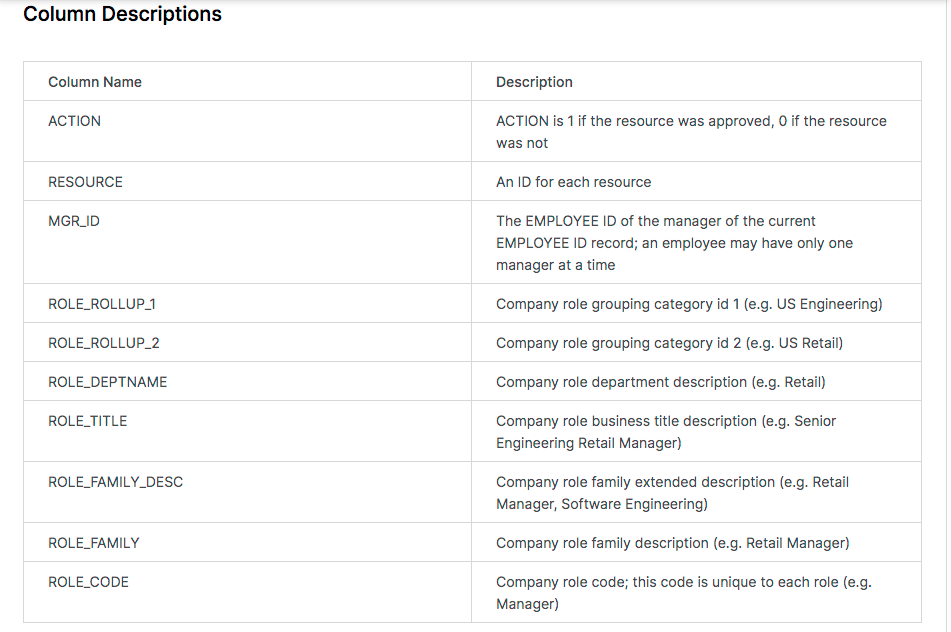

In [ ]:
!pip install pyforest

In [ ]:
import pyforest

##CatBoost

**CatBoost** is an algorithm for gradient boosting on decision trees. It is developed by Yandex researchers and engineers, and is used for search, recommendation systems, personal assistant, self-driving cars, weather prediction and many other tasks at Yandex and in other companies, including CERN, Cloudflare, Careem taxi. It is in open-source and can be used by anyone.

Procedure for other gradient boosting algorithms (XG boost, Light GBM) 

Step 1: Consider all (or a sample ) of the data points to train a highly biased model.

Step 2: Calculate residuals (errors) for each data point.

Step 3: Train another model with the same data points and corresponding residuals (errors) as class labels.

Step 4: Repeat Step 2 & Step 3 ( for n iterations).

This procedure is prone to overfitting, because we are calculating residuals of each data point by using the model that has already been trained on same set of data points.



**Advantages of CatBoost Library**

###Performance:

CatBoost provides state of the art results and it is competitive with any leading machine learning algorithm on the performance front.

Handling Categorical features automatically:

We can use CatBoost without any explicit pre-processing to convert categories into numbers. CatBoost converts categorical values into numbers using various statistics on combinations of categorical features and combinations of categorical and numerical features. You can read more about it here.

###Robust:

It reduces the need for extensive hyper-parameter tuning and lower the chances of overfitting also which leads to more generalized models. Although, CatBoost has multiple parameters to tune and it contains parameters like the number of trees, learning rate, regularization, tree depth, fold size, bagging temperature and others. You can read about all these parameters here.

**Ease-of-use:** You can use CatBoost from the command line, by  using a user-friendly API for both Python and R.

In [ ]:
!pip install catboost

In [ ]:
# Loading data directly from CatBoost
from catboost.datasets import amazon

traindf, testdf = amazon()

In [ ]:
traindf.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [ ]:
testdf.head()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,5,42093,50015,117961,118343,119598,118422,300136,118424,118425


In [ ]:
traindf.shape

(32769, 10)

In [ ]:
testdf.shape

(58921, 10)

In [ ]:
for col in traindf:
  print(col,   len(traindf[col].unique()))

ACTION 2
RESOURCE 7518
MGR_ID 4243
ROLE_ROLLUP_1 128
ROLE_ROLLUP_2 177
ROLE_DEPTNAME 449
ROLE_TITLE 343
ROLE_FAMILY_DESC 2358
ROLE_FAMILY 67
ROLE_CODE 343


In [ ]:
traindf.apply(lambda x:len(x.unique()))

ACTION                 2
RESOURCE            7518
MGR_ID              4243
ROLE_ROLLUP_1        128
ROLE_ROLLUP_2        177
ROLE_DEPTNAME        449
ROLE_TITLE           343
ROLE_FAMILY_DESC    2358
ROLE_FAMILY           67
ROLE_CODE            343
dtype: int64

In [ ]:
traindf["MGR_ID"].value_counts()

770      152
2270      99
2594      82
1350      71
2014      67
        ... 
97000      1
81506      1
12517      1
50296      1
22355      1
Name: MGR_ID, Length: 4243, dtype: int64

##Distribution of Features

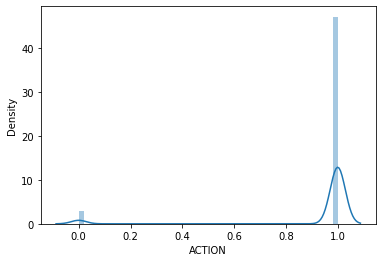

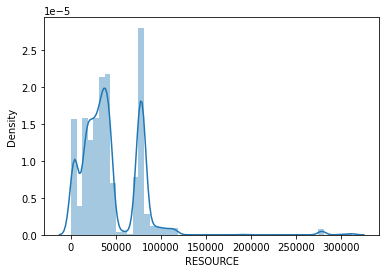

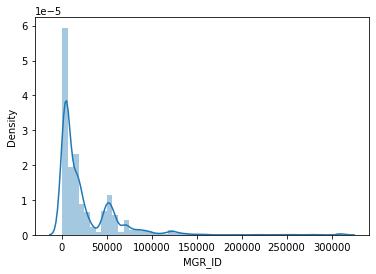

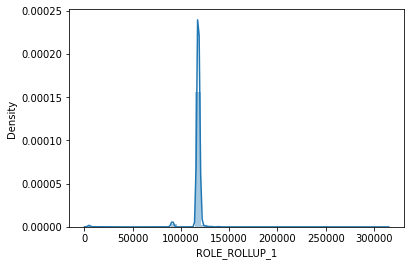

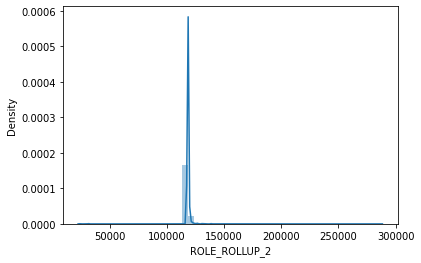

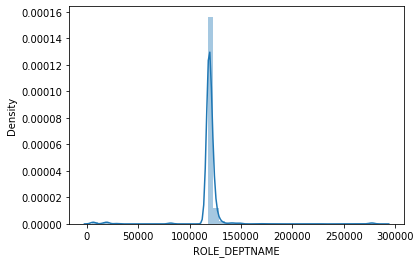

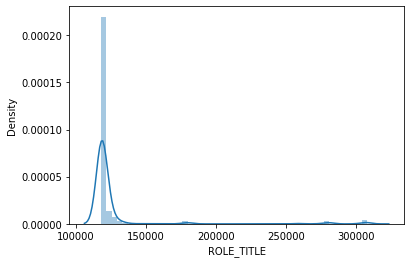

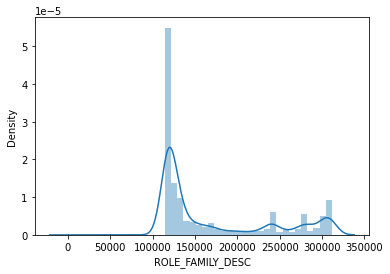

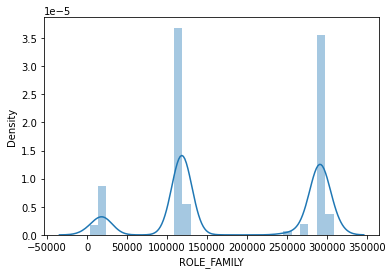

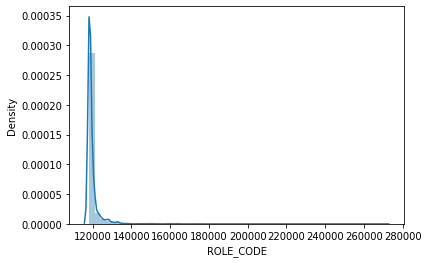

In [ ]:
import warnings
warnings.filterwarnings("ignore")


for i in traindf.describe():
  sns.distplot(traindf[i].dropna())
  plt.show()


In [ ]:
traindf["ACTION"].value_counts()

1    30872
0     1897
Name: ACTION, dtype: int64

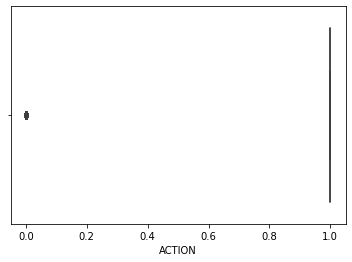

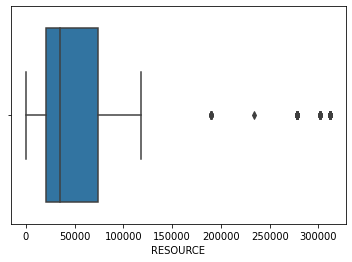

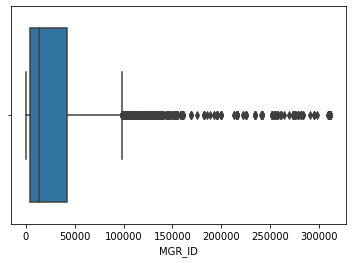

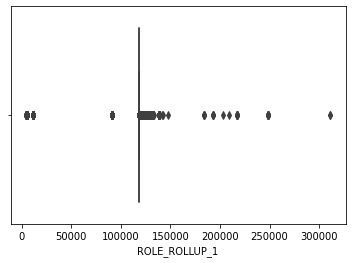

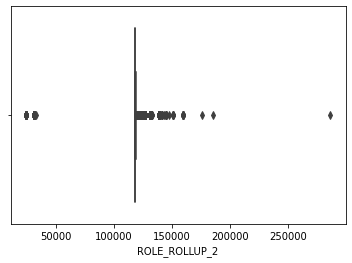

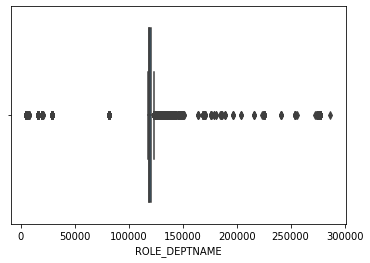

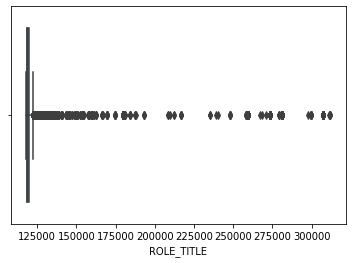

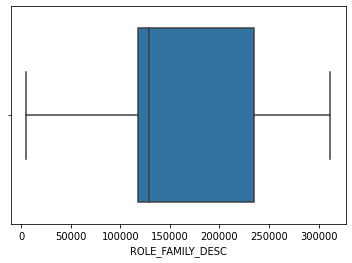

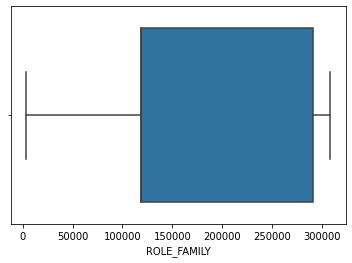

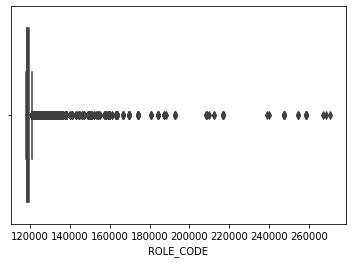

In [ ]:
for i in traindf.describe():
  sns.boxplot(traindf[i].dropna())
  plt.show()

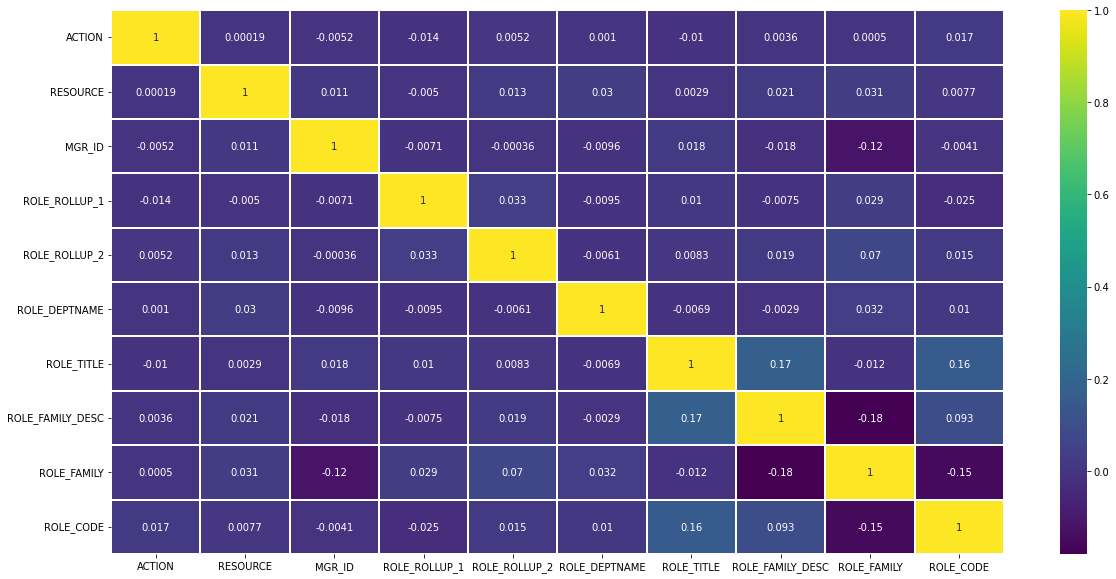

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(traindf.corr(),annot=True,cmap='viridis',linewidth=1);

No concern for multicollinearity as correlation among independent variables are quite reasonable

No need to perform PCA

In [ ]:
traindf.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [ ]:
testdf.head()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,5,42093,50015,117961,118343,119598,118422,300136,118424,118425


##Model Building

In [ ]:
##Dividing data into dependent and independent variables

y = traindf['ACTION']

x = traindf.drop('ACTION',axis=1) 

x_test = testdf.drop('id',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.3, random_state=1)

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
%%time

params= {"loss_function":"Logloss", #objective function
         "eval_metric":"AUC" ,# metric
         "verbose":200, ## output to stdout info about training process every 200 iterations
          "random_seed": 1
         }
 
catmodel_1 = CatBoostClassifier(**params)
catmodel_1 .fit(x_train,y_train, eval_set=(x_valid, y_valid), # data to validate on
          use_best_model=True # True if we don't want to save trees created after iteration with the best validation score
         );



Learning rate set to 0.068702
0:	test: 0.5411584	best: 0.5411584 (0)	total: 32.6ms	remaining: 32.5s
200:	test: 0.8054496	best: 0.8054496 (200)	total: 5.4s	remaining: 21.5s
400:	test: 0.8234160	best: 0.8234160 (400)	total: 11.4s	remaining: 17s
600:	test: 0.8331189	best: 0.8332287 (587)	total: 18.5s	remaining: 12.2s
800:	test: 0.8374659	best: 0.8382637 (781)	total: 25.4s	remaining: 6.3s
999:	test: 0.8430070	best: 0.8434856 (989)	total: 32.2s	remaining: 0us

bestTest = 0.8434855797
bestIteration = 989

Shrink model to first 990 iterations.
CPU times: user 17.7 s, sys: 6.58 s, total: 24.3 s
Wall time: 32.7 s


In [ ]:
x.head()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [ ]:
#In the above model CatBoost treated categorical features as numerical ones. Thus, the categories were ranked. We need to specify which features are categorical

categorical_features= list(range(x.shape[1]))
print(categorical_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8]


In [ ]:
%%time

params= {"loss_function":"Logloss", #objective function
         "eval_metric":"AUC" ,# metric
         "verbose":200, ## output to stdout info about training process every 200 iterations
          "random_seed": 1,
         "cat_features":categorical_features
         }
 
catmodel_2 = CatBoostClassifier(**params)
catmodel_2 .fit(x_train,y_train, eval_set=(x_valid, y_valid), # data to validate on
          use_best_model=True # True if we don't want to save trees created after iteration with the best validation score
         );


Learning rate set to 0.068702
0:	test: 0.5000000	best: 0.5000000 (0)	total: 40.1ms	remaining: 40s
200:	test: 0.8899904	best: 0.8900679 (193)	total: 23.2s	remaining: 1m 32s
400:	test: 0.8925014	best: 0.8927750 (370)	total: 34.8s	remaining: 52s
600:	test: 0.8921782	best: 0.8928254 (568)	total: 46.8s	remaining: 31.1s
800:	test: 0.8926539	best: 0.8928254 (568)	total: 58.7s	remaining: 14.6s
999:	test: 0.8915778	best: 0.8928254 (568)	total: 1m 10s	remaining: 0us

bestTest = 0.8928253521
bestIteration = 568

Shrink model to first 569 iterations.
CPU times: user 1min 50s, sys: 2.92 s, total: 1min 53s
Wall time: 1min 11s


##Cross Validation

In [ ]:
from catboost.core import Pool
from catboost import cv




params = {'loss_function':'Logloss',
          'eval_metric':'AUC',
          'verbose': 200,
          'random_seed':1
         }




# pool for Dataset processing.

total_train_data = Pool(data=x,
                      label=y,
                      cat_features= categorical_features
                     )

scores = cv(pool=total_train_data,
            params=params, 
            fold_count=4,
            seed=1, 
            shuffle=True,
            stratified=True, # if True the folds are made by preserving the percentage of samples for each class
           )

Training on fold [0/4]
0:	test: 0.5000000	best: 0.5000000 (0)	total: 23.8ms	remaining: 23.8s
200:	test: 0.8948050	best: 0.8948050 (200)	total: 10.6s	remaining: 42s
400:	test: 0.8993043	best: 0.8993043 (400)	total: 28s	remaining: 41.8s
600:	test: 0.9019037	best: 0.9019037 (600)	total: 41.7s	remaining: 27.7s
800:	test: 0.9027905	best: 0.9031492 (781)	total: 54.4s	remaining: 13.5s
999:	test: 0.9036792	best: 0.9036792 (999)	total: 1m 7s	remaining: 0us

bestTest = 0.9036791642
bestIteration = 999

Training on fold [1/4]
0:	test: 0.5000000	best: 0.5000000 (0)	total: 17.9ms	remaining: 17.9s
200:	test: 0.8835559	best: 0.8840146 (166)	total: 10.5s	remaining: 41.7s
400:	test: 0.8852191	best: 0.8853875 (382)	total: 22.9s	remaining: 34.2s
600:	test: 0.8859059	best: 0.8859447 (591)	total: 36s	remaining: 23.9s
800:	test: 0.8860087	best: 0.8865844 (746)	total: 48.9s	remaining: 12.2s
999:	test: 0.8841890	best: 0.8865844 (746)	total: 1m 2s	remaining: 0us

bestTest = 0.8865843778
bestIteration = 746

Tr

In [ ]:
feature_imp2=catmodel_2.get_feature_importance(prettified=True)
feature_imp2

,Feature Id,Importances
0,RESOURCE,20.162058
1,ROLE_DEPTNAME,17.411475
2,MGR_ID,14.312541
3,ROLE_ROLLUP_2,12.141164
4,ROLE_FAMILY_DESC,10.293337
5,ROLE_TITLE,8.522308
6,ROLE_FAMILY,7.294624
7,ROLE_ROLLUP_1,6.272114
8,ROLE_CODE,3.590378


In [ ]:
feature_imp1=catmodel_1.get_feature_importance(prettified=True)
feature_imp1

,Feature Id,Importances
0,ROLE_DEPTNAME,16.598093
1,MGR_ID,15.235174
2,ROLE_FAMILY_DESC,14.759273
3,RESOURCE,13.391833
4,ROLE_ROLLUP_2,11.057936
5,ROLE_FAMILY,8.329828
6,ROLE_TITLE,7.537161
7,ROLE_CODE,7.490433
8,ROLE_ROLLUP_1,5.600268


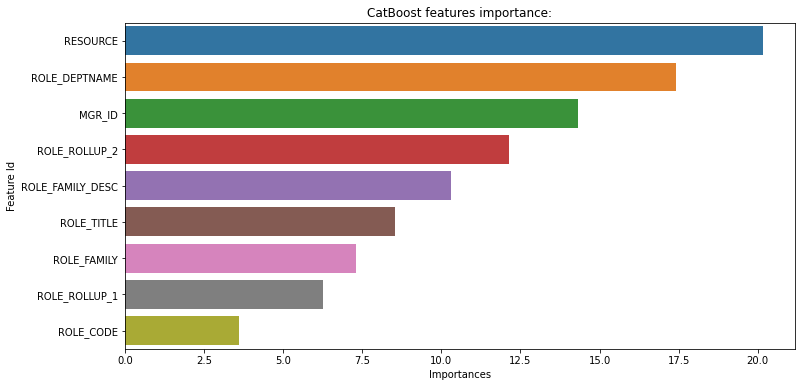

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6));
sns.barplot(x="Importances", y="Feature Id", data=feature_imp2, orient= "h");
plt.title('CatBoost features importance:');

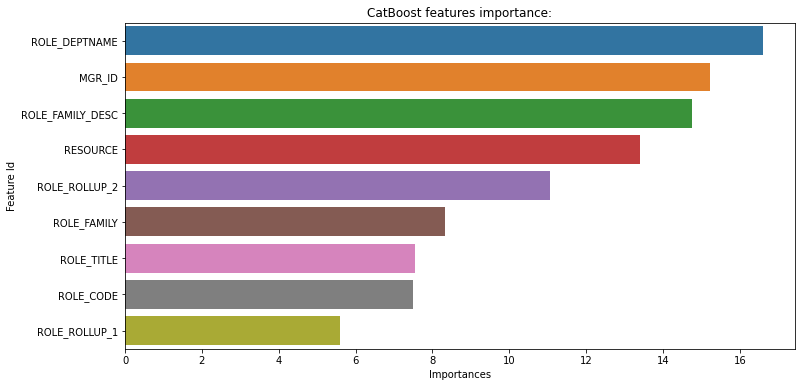

In [ ]:

plt.figure(figsize=(12, 6));
sns.barplot(x="Importances", y="Feature Id", data=feature_imp1, orient= "h");
plt.title('CatBoost features importance:');

From the observations above it could be infered that catmodel_2 performs a lot better than catmodel_1, so that becomes our model for predictions

In [ ]:
predictions= catmodel_2.predict_proba(x_test)
predictions

array([[0.52718966, 0.47281034],
       [0.0410616 , 0.9589384 ],
       [0.00702162, 0.99297838],
       ...,
       [0.01201313, 0.98798687],
       [0.06246578, 0.93753422],
       [0.02244058, 0.97755942]])

In [ ]:
catmodel_2.score(x_valid,y_valid)

0.953514393245855

In [ ]:
traindf['ACTION'].value_counts()

1    30872
0     1897
Name: ACTION, dtype: int64

##IMPORTANT

**Note** that our target column **(ACTION)** contained 30872 1s and only 1897 0s. This is an indication of data imbalance. We can deal with this and use the same steps above to build the algorithm.

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=1)

In [ ]:
x_train1,y_train1= sm.fit_resample(x_train,y_train)
x_valid1,y_valid1=sm.fit_resample(x_valid,y_valid)

In [ ]:
%%time

params= {"loss_function":"Logloss", #objective function
         "eval_metric":"AUC" ,# metric
         "verbose":200, ## output to stdout info about training process every 200 iterations
          "random_seed": 1,
         "cat_features":categorical_features
         }
 
catmodel_2 = CatBoostClassifier(**params)
catmodel_2 .fit(x_train1,y_train1, eval_set=(x_valid1, y_valid1), # data to validate on
          use_best_model=True # True if we don't want to save trees created after iteration with the best validation score
         );


Learning rate set to 0.08032
0:	test: 0.9488945	best: 0.9488945 (0)	total: 95.6ms	remaining: 1m 35s
200:	test: 0.9903717	best: 0.9903785 (194)	total: 20.6s	remaining: 1m 22s
400:	test: 0.9905563	best: 0.9906180 (361)	total: 43.1s	remaining: 1m 4s
600:	test: 0.9903621	best: 0.9906180 (361)	total: 1m 5s	remaining: 43.7s
800:	test: 0.9904164	best: 0.9906180 (361)	total: 1m 29s	remaining: 22.1s
999:	test: 0.9902450	best: 0.9906180 (361)	total: 1m 52s	remaining: 0us

bestTest = 0.9906180305
bestIteration = 361

Shrink model to first 362 iterations.
CPU times: user 3min 31s, sys: 2.71 s, total: 3min 34s
Wall time: 1min 53s


In [ ]:
catmodel_2.score(x_valid1,y_valid1)

0.9652014652014652

As you can see after dealing with the data imbalance, our model is actually perfoming good

#**Alternatively**
Consider building a Logistic Regression on same dataset to compare the results

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

In [ ]:
hot= OneHotEncoder()

hot.fit_transform(x_train1)

<43180x66845 sparse matrix of type '<class 'numpy.float64'>'
	with 388620 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.preprocessing import LabelEncoder
label= LabelEncoder()
for i in cols:
  x_train1[i]=label.fit_transform(x_train1[i])

for i in cols:
  x_valid[i]=label.fit_transform(x_valid[i])

In [ ]:
cols= list(x_train1.columns)
cols

['RESOURCE',
 'MGR_ID',
 'ROLE_ROLLUP_1',
 'ROLE_ROLLUP_2',
 'ROLE_DEPTNAME',
 'ROLE_TITLE',
 'ROLE_FAMILY_DESC',
 'ROLE_FAMILY',
 'ROLE_CODE']

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(x_train1,y_train1)

LogisticRegression()

In [ ]:
lr.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_pred= lr.predict(x_valid1)

In [ ]:
lr.score(x_valid,y_valid)

0.7906621910283796

##To Conclude

Our Regression model is not performing great as compared to our catboost model_2. But note we did not conisder hyperparameter tuining for this regression model